In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("white")

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Ames = pd.read_csv('train.csv', keep_default_na=False,na_values='')
Ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [3]:
Ames.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            1
Bsmt Cond            1
Bsmt Exposure        4
BsmtFin Type 1       1
BsmtFin SF 1         1
BsmtFin Type 2       2
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [4]:
print('Number of House Id labels: ', len(Ames.Id.unique()))
print('Number of Houses in the Dataset: ', len(Ames))

Number of House Id labels:  2051
Number of Houses in the Dataset:  2051


In [5]:
categorical = [each for each in Ames.columns if Ames[each].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

There are 42 categorical variables


In [1]:
# make a list of the numerical variables first
numerical = [each for each in Ames.columns if Ames[each].dtype!='O']

# list of variables that contain year information
year_data = [each for each in numerical if 'Yr' in each or 'Year' in each]

year_data

NameError: name 'Ames' is not defined

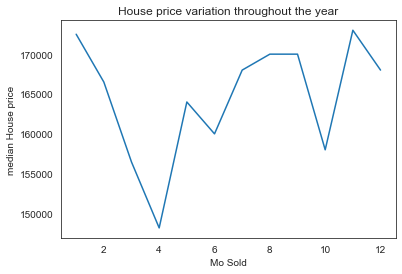

In [7]:
Ames.groupby('Mo Sold')['SalePrice'].median().plot()
plt.title('House price variation throughout the year')
plt.ylabel('median House price');

In [8]:
# let's visualise the values of the discrete variables
discrete = []

for each in numerical:
    if len(Ames[each].unique()) < 20 and each not in year_data:
        print(each, ' values: ', Ames[each].unique())
        discrete.append(each)
print()
print('There are {} discrete variables'.format(len(discrete)))

MS SubClass  values:  [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
Overall Qual  values:  [ 6  7  5  8 10  4  9  3  2  1]
Overall Cond  values:  [8 5 7 6 3 9 2 4 1]
Bsmt Full Bath  values:  [ 0.  1.  2. nan  3.]
Bsmt Half Bath  values:  [ 0.  1. nan  2.]
Full Bath  values:  [2 1 3 0 4]
Half Bath  values:  [1 0 2]
Bedroom AbvGr  values:  [3 4 2 5 1 0 6 8]
Kitchen AbvGr  values:  [1 2 0 3]
TotRms AbvGrd  values:  [ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]
Fireplaces  values:  [0 1 2 4 3]
Garage Cars  values:  [ 2.  1.  3.  0.  4.  5. nan]
Pool Area  values:  [  0 519 576 800 228 480 648 738 368 561]
Mo Sold  values:  [ 3  4  1  6  5  9  7  2 12 10 11  8]

There are 14 discrete variables


In [9]:
numerical = [each for each in numerical if each not in discrete and each not in [
    'Id', 'SalePrice'] and each not in year_data]

print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 19 numerical and continuous variables


In [10]:
# let's output variables with NA and the percentage of NA

for each in Ames.columns:
    if Ames[each].isnull().sum() > 0:
        print(each, Ames[each].isnull().mean())

Lot Frontage 0.16089712335446124
Mas Vnr Type 0.010726474890297415
Mas Vnr Area 0.010726474890297415
Bsmt Qual 0.00048756704046806434
Bsmt Cond 0.00048756704046806434
Bsmt Exposure 0.0019502681618722574
BsmtFin Type 1 0.00048756704046806434
BsmtFin SF 1 0.00048756704046806434
BsmtFin Type 2 0.0009751340809361287
BsmtFin SF 2 0.00048756704046806434
Bsmt Unf SF 0.00048756704046806434
Total Bsmt SF 0.00048756704046806434
Bsmt Full Bath 0.0009751340809361287
Bsmt Half Bath 0.0009751340809361287
Garage Yr Blt 0.05558264261335934
Garage Finish 0.00048756704046806434
Garage Cars 0.00048756704046806434
Garage Area 0.00048756704046806434
Garage Qual 0.00048756704046806434
Garage Cond 0.00048756704046806434


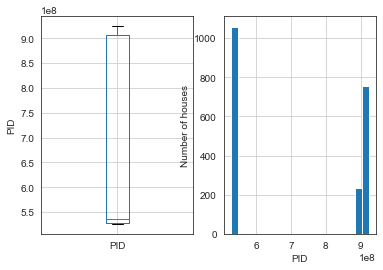

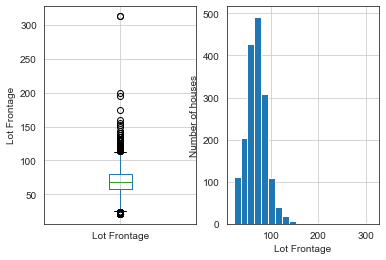

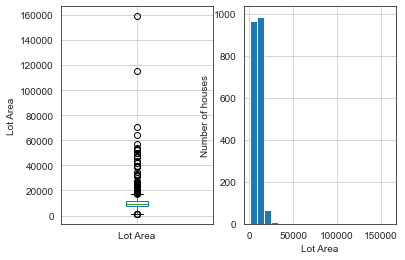

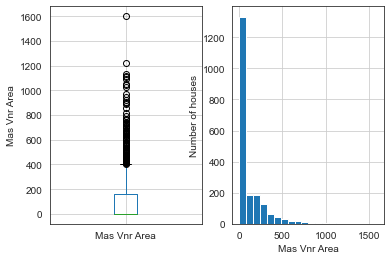

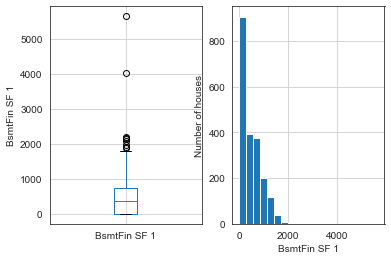

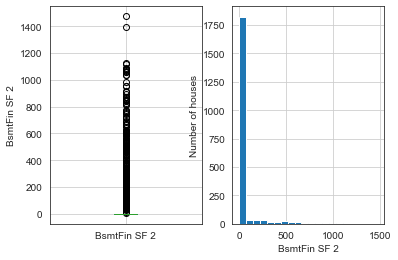

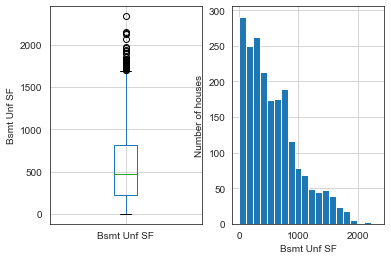

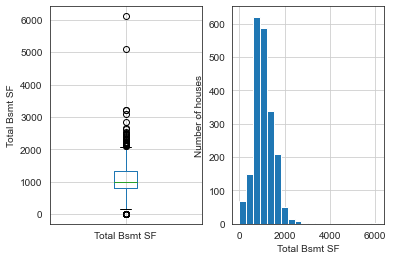

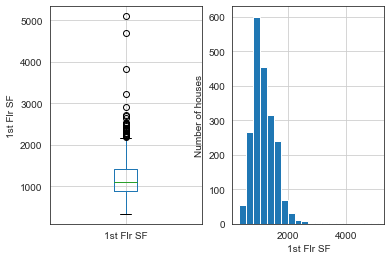

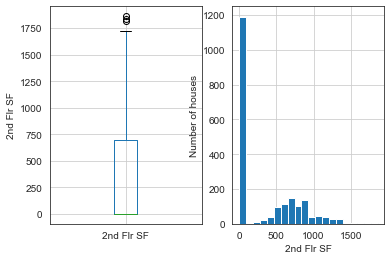

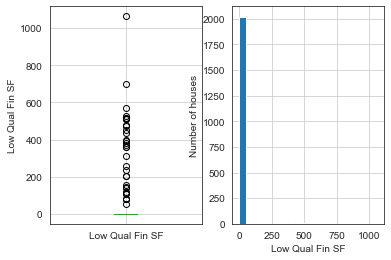

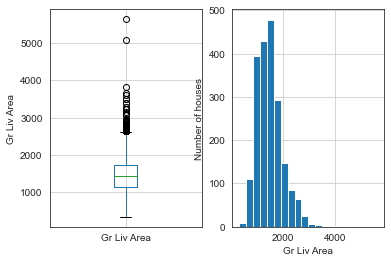

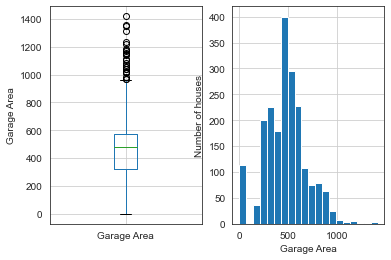

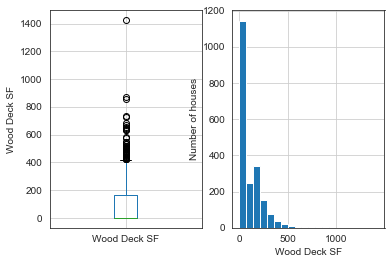

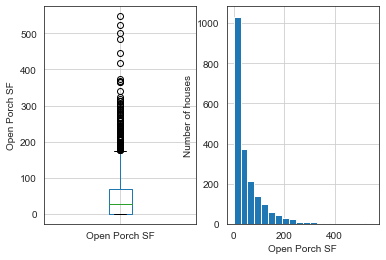

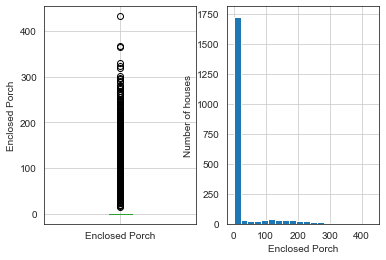

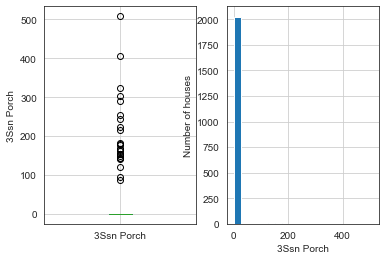

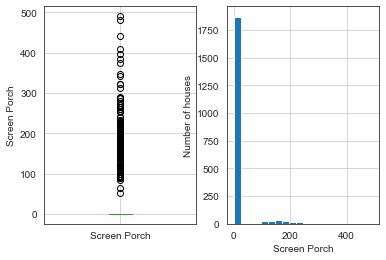

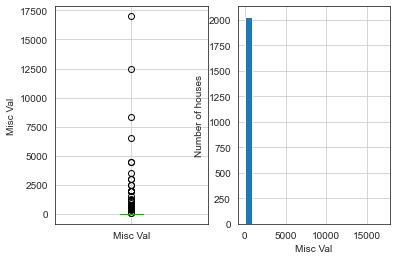

In [11]:
for each in numerical:
    plt.figure(figsize=(6,4))
    plt.subplot(1, 2, 1)
    fig = Ames.boxplot(column=each)
    fig.set_title('')
    fig.set_ylabel(each)
    
    plt.subplot(1, 2, 2)
    fig = Ames[each].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(each);

    plt.show()

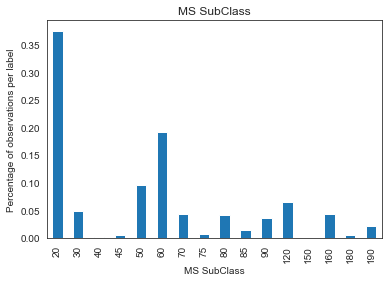

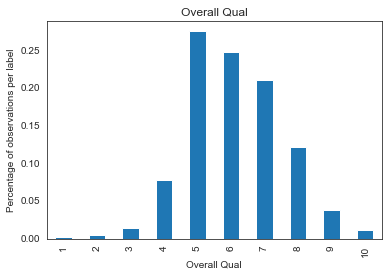

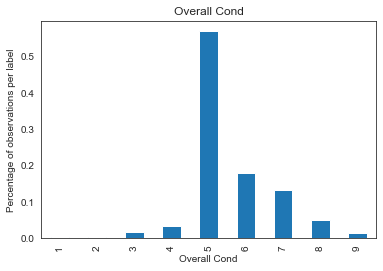

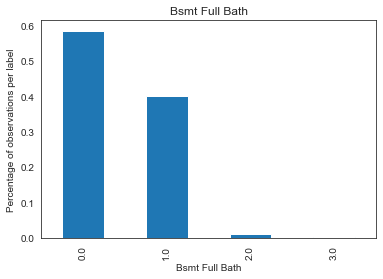

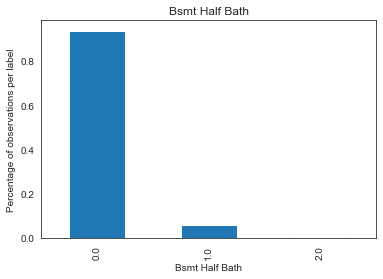

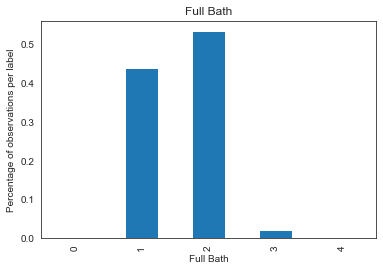

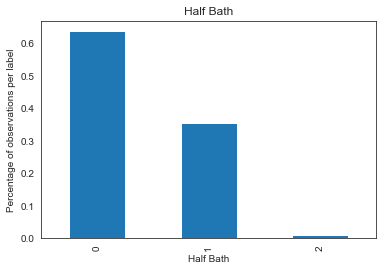

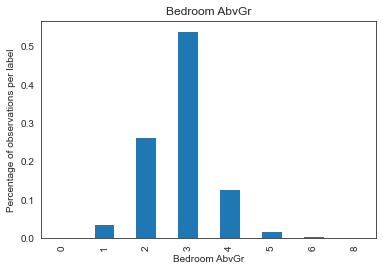

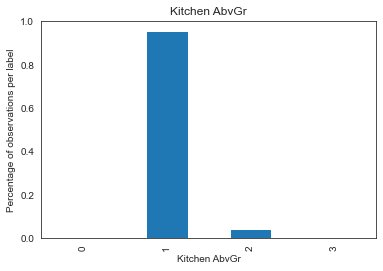

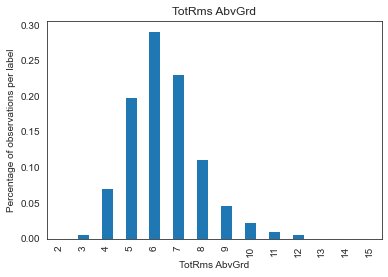

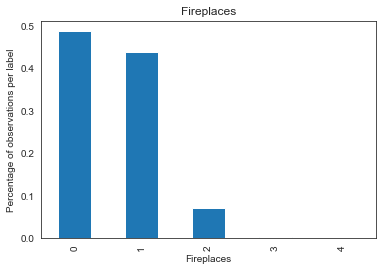

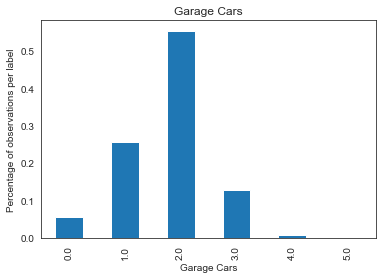

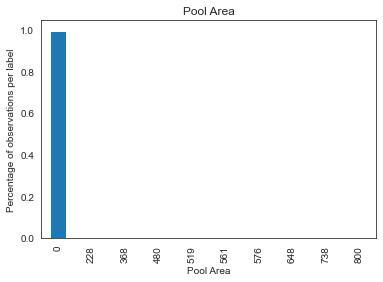

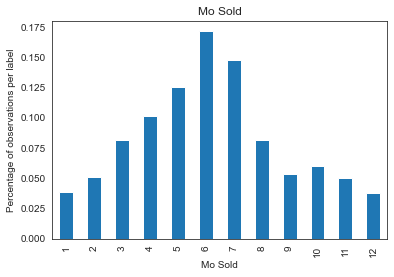

In [12]:
for each in discrete:
    (Ames.groupby(each)[each].count() / np.float(len(Ames))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(each);
    plt.show()

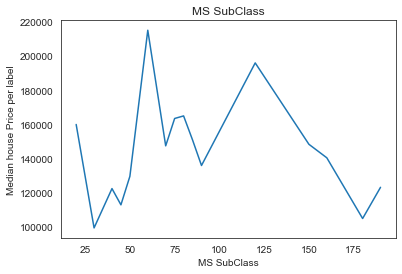

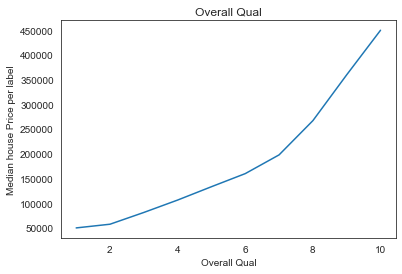

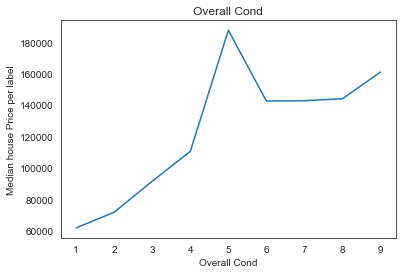

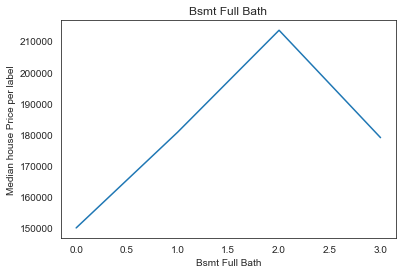

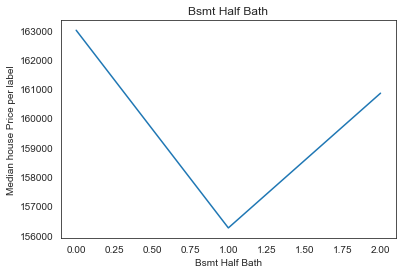

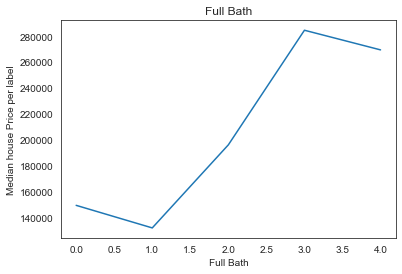

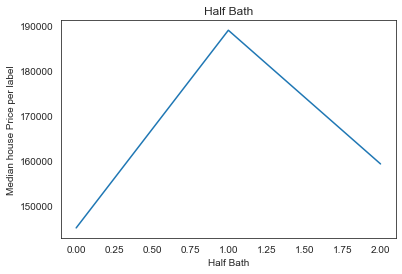

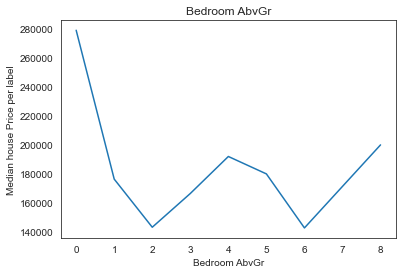

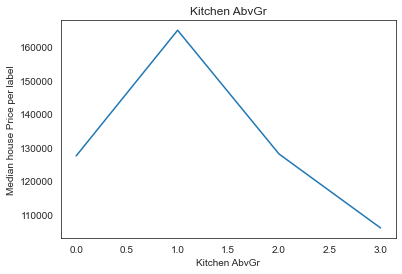

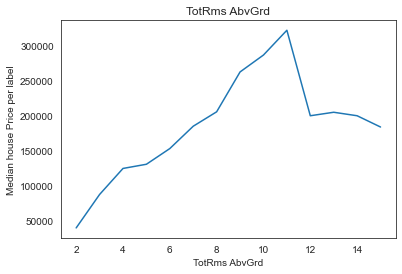

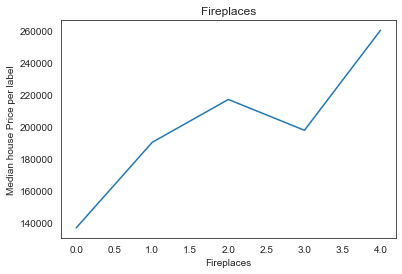

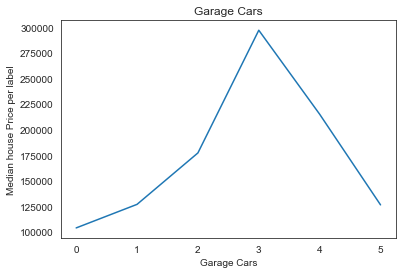

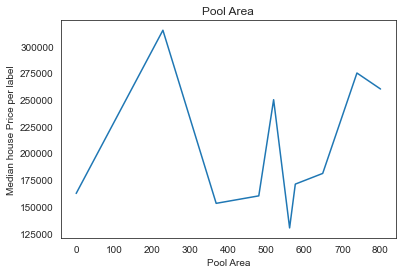

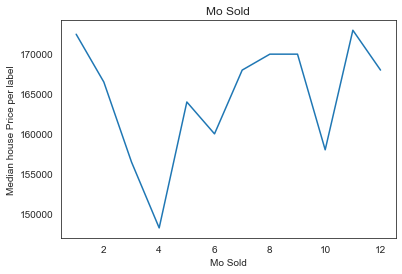

In [13]:
for each in discrete:
    Ames.groupby(each)['SalePrice'].median().plot()
    plt.ylabel('Median house Price per label')
    plt.title(each);
    plt.show()

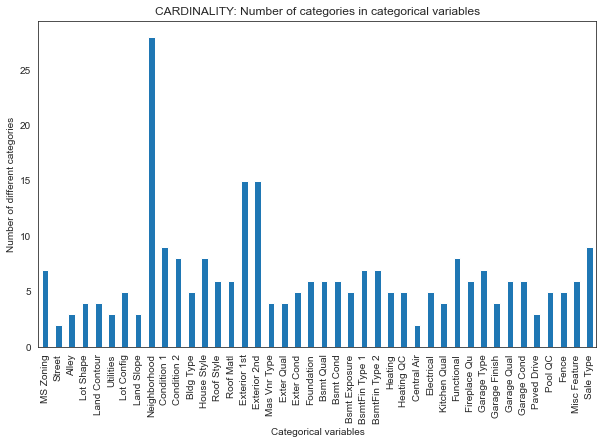

In [14]:
Ames[categorical].nunique().plot.bar(figsize=(10,6))
plt.title('CARDINALITY: Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories');

In [15]:
X_train, X_test, y_train, y_test = train_test_split(Ames.drop(['Id', 'SalePrice'], axis=1),
                                                    Ames['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((1845, 79), (206, 79))

In [16]:
def elapsed_years(Ames, each):
    # capture difference between year variable and
    # year the house was sold
    
    Ames[each] = Ames['Yr Sold'] - Ames[each]
    return Ames

In [17]:
for each in ['Year Built', 'Year Remod/Add', 'Garage Yr Blt']:
    X_train = elapsed_years(X_train, each)
    X_test = elapsed_years(X_test, each)

In [18]:
X_train[['Year Built', 'Year Remod/Add', 'Garage Yr Blt']].head()

,Year Built,Year Remod/Add,Garage Yr Blt
1521,31,31,31.0
2035,84,56,84.0
30,28,28,28.0
996,67,56,67.0
1562,43,9,43.0


In [19]:
# drop YrSold
X_train.drop('Yr Sold', axis=1, inplace=True)
X_test.drop('Yr Sold', axis=1, inplace=True)

In [20]:
final_columns = X_train.columns

In [21]:
# print variables with missing data
# keep in mind that now that we created those new temporal variables, we
# are going to treat them as numerical and continuous:

# remove YrSold from the variable list
# because it is no longer in our dataset
year_data.remove('Yr Sold')

# examine percentage of missing values
for each in numerical+year_data:
    if X_train[each].isnull().mean() > 0:
        print(each, X_train[each].isnull().mean())

Lot Frontage 0.16205962059620596
Mas Vnr Area 0.011382113821138212
BsmtFin SF 1 0.0005420054200542005
BsmtFin SF 2 0.0005420054200542005
Bsmt Unf SF 0.0005420054200542005
Total Bsmt SF 0.0005420054200542005
Garage Area 0.0005420054200542005
Garage Yr Blt 0.05745257452574526


In [22]:
for each in categorical:
    if X_train[each].isnull().mean() > 0:
        print(each, X_train[each].isnull().mean())

Mas Vnr Type 0.011382113821138212
Bsmt Qual 0.0005420054200542005
Bsmt Cond 0.0005420054200542005
Bsmt Exposure 0.001084010840108401
BsmtFin Type 1 0.0005420054200542005
BsmtFin Type 2 0.001084010840108401
Garage Finish 0.0005420054200542005
Garage Qual 0.0005420054200542005
Garage Cond 0.0005420054200542005


In [23]:
X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [24]:
Ames_pipe = Pipeline([

    # missing data imputation - section 4
    ('missing_ind', mdi.AddMissingIndicator(
        variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),

    # categorical encoding - section 6
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(
        tol=0.05, n_categories=6, variables=categorical+discrete)),
    ('categorical_enc', ce.OrdinalCategoricalEncoder(
        encoding_method='ordered', variables=categorical+discrete)),

    # discretisation + encoding - section 8
    ('discretisation', dsc.EqualFrequencyDiscretiser(
        q=5, return_object=True, variables=numerical)),
    ('encoding', ce.OrdinalCategoricalEncoder(
        encoding_method='ordered', variables=numerical)),

    # feature Scaling - section 10
    ('scaler', StandardScaler()),
    
    # regression
    ('lasso', Lasso(random_state=0))
])

In [25]:
# let's fit the pipeline
Ames_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = Ames_pipe.predict(X_train)
X_test_preds = Ames_pipe.predict(X_test)

KeyError: 'LotFrontage'

In [ ]:
# a peek into the prediction values
X_train_preds

In [ ]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

In [ ]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price');

In [ ]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6));